In [16]:
%load_ext autoreload
%autoreload 1
%aimport vae
%aimport distributions
%aimport distribution_metrics
%aimport y_utils
%aimport samplers
%aimport utilities
%aimport rnvp
%aimport flow_trainer
from utilities import *
from y_utils import *
from vae import VAE, get_filename
from samplers import *
from distributions import Banana, Funnel, create_gaussian_lattice, create_random_gaussian_mixture
from distribution_metrics import *
import torch
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from time import time
from tqdm import tqdm
from collections import defaultdict
from math import ceil
import seaborn as sns
from rnvp import RNVP
from flow_trainer import FlowTrainer

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device:', device)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
device: cpu


In [53]:
target = Funnel(dim=2, device=device, a=2)

In [51]:
lattice_shape = (5, 5)
mode_variance = 0.01
target = create_gaussian_lattice(lattice_shape, 1, mode_variance, device=device)

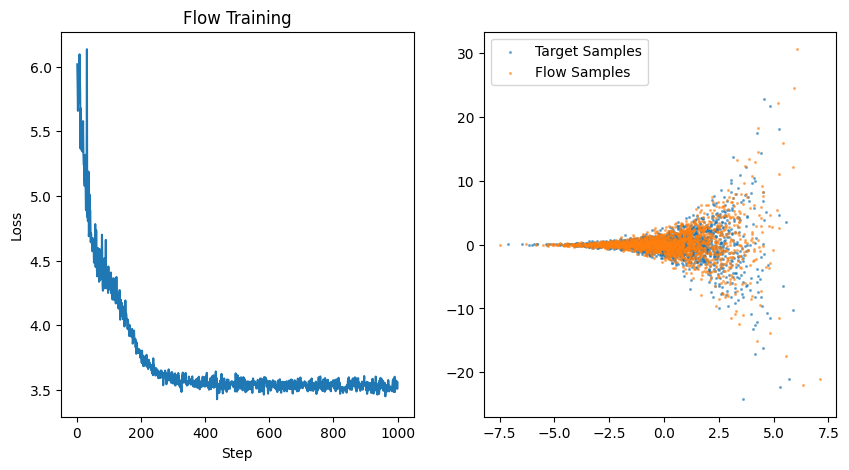

Step 1000
	Loss: 3.5567
	Learning rate: 0.001


In [54]:
flow = RNVP(num_blocks=10, dim=2, device=device)
flow_trainer = FlowTrainer(flow, target, batch_size=2048, device=device)
flow_trainer.train(n_steps=1000, plot_interval=100)

method